In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Yelp Reviews

In [2]:
df = pd.read_csv('yelp_labelled.txt', sep='\t', header=None)

In [3]:
df.rename(columns={0: 'Review', 1: 'Positive'}, inplace=True)

In [4]:
# replace punctuation 
df['Review'] = df.Review.str.replace(r'[^a-zA-Z\d\s:]', '')
# make lower case
df['Review'] = df['Review'].str.lower()

In [5]:
df.head()

,Review,Positive
0,wow loved this place,1
1,crust is not good,0
2,not tasty and the texture was just nasty,0
3,stopped by during the late may bank holiday of...,1
4,the selection on the menu was great and so wer...,1


## Guesses

In [6]:
testlist1 = ['great', 'loved', 'excellent', 'delicious', 'best', 'accomodate',
            'delightful', 'awesome', 'amazing', 'beautiful', 'pretty', 'classic', 'compliments',
            'exceptional', 'enjoyed', 'enthusiastic', 'fabulous', 'outstanding', 'perfection',
            'perfect', 'perfectly', 'friendly', 'excellent', 'promptly', 'tender',
           'wonderful', 'fantastic', 'happy', 'would recommend', 'quick', 'fast',
           'welcome', 'speedy', 'succulent', 'professional']

testlist2 = ['terrible', 'bad', 'not good', 'slow', 'hated', 'hate', 'nasty', 'didnt', 'bland', 'angry']

In [7]:
#Complete list of words used in positive reviews:

goodwords = df.Review[df.Positive == 1].str.cat(sep=' ').split()
goodwords

['wow',
 'loved',
 'this',
 'place',
 'stopped',
 'by',
 'during',
 'the',
 'late',
 'may',
 'bank',
 'holiday',
 'off',
 'rick',
 'steve',
 'recommendation',
 'and',
 'loved',
 'it',
 'the',
 'selection',
 'on',
 'the',
 'menu',
 'was',
 'great',
 'and',
 'so',
 'were',
 'the',
 'prices',
 'the',
 'fries',
 'were',
 'great',
 'too',
 'a',
 'great',
 'touch',
 'service',
 'was',
 'very',
 'prompt',
 'i',
 'tried',
 'the',
 'cape',
 'cod',
 'ravoli',
 'chickenwith',
 'cranberrymmmm',
 'highly',
 'recommended',
 'the',
 'food',
 'amazing',
 'service',
 'is',
 'also',
 'cute',
 'i',
 'could',
 'care',
 'less',
 'the',
 'interior',
 'is',
 'just',
 'beautiful',
 'so',
 'they',
 'performed',
 'thats',
 'rightthe',
 'red',
 'velvet',
 'cakeohhh',
 'this',
 'stuff',
 'is',
 'so',
 'good',
 'this',
 'hole',
 'in',
 'the',
 'wall',
 'has',
 'great',
 'mexican',
 'street',
 'tacos',
 'and',
 'friendly',
 'staff',
 'also',
 'there',
 'are',
 'combos',
 'like',
 'a',
 'burger',
 'fries',
 'and',
 

In [8]:
#Complete list of words used in negative reviews:

badwords = df.Review[df.Positive == 0].str.cat(sep=' ').split()
badwords

['crust',
 'is',
 'not',
 'good',
 'not',
 'tasty',
 'and',
 'the',
 'texture',
 'was',
 'just',
 'nasty',
 'now',
 'i',
 'am',
 'getting',
 'angry',
 'and',
 'i',
 'want',
 'my',
 'damn',
 'pho',
 'honeslty',
 'it',
 'didnt',
 'taste',
 'that',
 'fresh',
 'the',
 'potatoes',
 'were',
 'like',
 'rubber',
 'and',
 'you',
 'could',
 'tell',
 'they',
 'had',
 'been',
 'made',
 'up',
 'ahead',
 'of',
 'time',
 'being',
 'kept',
 'under',
 'a',
 'warmer',
 'would',
 'not',
 'go',
 'back',
 'the',
 'cashier',
 'had',
 'no',
 'care',
 'what',
 'so',
 'ever',
 'on',
 'what',
 'i',
 'had',
 'to',
 'say',
 'it',
 'still',
 'ended',
 'up',
 'being',
 'wayyy',
 'overpriced',
 'i',
 'was',
 'disgusted',
 'because',
 'i',
 'was',
 'pretty',
 'sure',
 'that',
 'was',
 'human',
 'hair',
 'i',
 'was',
 'shocked',
 'because',
 'no',
 'signs',
 'indicate',
 'cash',
 'only',
 'waitress',
 'was',
 'a',
 'little',
 'slow',
 'in',
 'service',
 'this',
 'place',
 'is',
 'not',
 'worth',
 'your',
 'time',
 'le

In [9]:
#Unique words from goodwords and badwords:

print('Positive:', len(np.unique(goodwords)), 'Negative:', len(np.unique(badwords)))

Positive: 1246 Negative: 1397


In [10]:
#"diffs" contain lists of words unique to goodwords, badwords.

gooddiff = np.setdiff1d(ar1=pd.Series(goodwords).value_counts().keys().ravel(),
                   ar2=pd.Series(badwords).value_counts().keys().ravel())
baddiff = np.setdiff1d(ar1=pd.Series(badwords).value_counts().keys().ravel(),
                   ar2=pd.Series(goodwords).value_counts().keys().ravel())

In [11]:
gooddiff

array(['2007', '23', '6', '7', '70', 'absolute', 'absolutley', 'accident',
       'accommodations', 'accomodate', 'accordingly', 'across', 'added',
       'affordable', 'afternoon', 'airport', 'almonds', 'amazingrge',
       'ambience', 'ample', 'andddd', 'app', 'appetizers', 'approval',
       'aria', 'array', 'assure', 'atmosphere1', 'auju', 'awesome', 'ayce',
       'az', 'baba', 'bacon', 'baklava', 'bank', 'bargain', 'bartender',
       'bartenders', 'baseball', 'bbq', 'bean', 'beateous', 'beautiful',
       'beautifully', 'beauty', 'beers', 'bellies', 'belly', 'biscuit',
       'bits', 'blanket', 'block', 'bloddy', 'blue', 'bone',
       'booksomethats', 'bowl', 'boxes', 'boyfriend', 'boys', 'bread',
       'breakfastlunch', 'breeze', 'brick', 'brings', 'bruschetta',
       'buffets', 'buldogis', 'bunch', 'butter', 'caballeros', 'caesar',
       'caf', 'cakeohhh', 'calligraphy', 'cannoli', 'cape', 'capers',
       'caring', 'carpaccio', 'case', 'cavier', 'chai', 'charming',
      

In [12]:
baddiff

array(['1', '10', '1199', '12', '15', '15lb', '17', '1979', '30', '30s',
       '34ths', '35', '400', '40min', '45', '785', '90', 'accountant',
       'ache', 'acknowledged', 'actual', 'ahead', 'airline', 'ala',
       'albondigas', 'allergy', 'alone', 'although', 'angry',
       'anticipated', 'anymore', 'anytime', 'anyways', 'apart',
       'apologize', 'apology', 'appalling', 'apparently', 'appealing',
       'appetite', 'appetizer', 'apple', 'arent', 'arepas', 'arrives',
       'arriving', 'article', 'asked', 'asking', 'atrocious', 'attached',
       'attack', 'attention', 'attitudes', 'average', 'avocado', 'avoid',
       'avoided', 'awful', 'awkward', 'awkwardly', 'bad', 'ball', 'bamboo',
       'banana', 'bare', 'barely', 'based', 'basically', 'batch', 'batter',
       'beensteppedinandtrackedeverywhere', 'begin', 'behind', 'bellagio',
       'below', 'besides', 'between', 'bigger', 'biggest', 'binge', 'bird',
       'bisque', 'bitches', 'bites', 'blah', 'blame', 'bland', 'bland

## Words above arbitrary threshold of occurrance

In [13]:
good_df = pd.DataFrame(goodwords)

good_freq = good_df[good_df[0].isin(gooddiff)]

good_rank = pd.DataFrame(good_freq[0].value_counts()).reset_index()

top_good = good_rank[good_rank[0] >= 3]['index']

top_good.ravel()

array(['great', 'delicious', 'awesome', 'fantastic', 'perfect', 'loved',
       'excellent', 'happy', 'spot', 'wonderful', 'town', 'tender',
       'reasonable', 'bread', 'bacon', 'enjoyed', 'visit', 'wrong',
       'steaks', 'options', 'incredible', 'fun', 'chef', 'decor', 'party',
       'pleased', 'perfectly', 'delish', 'hummus', 'greek', 'beautiful',
       'fine', 'second', 'cool', 'melt', 'patio', 'butter', 'favorite',
       'youre', 'white', 'generous', 'interesting', 'until', 'boyfriend',
       'flavorful', 'healthy', 'wow', 'homemade', 'regular', 'mouth',
       'moist', 'duck', 'ambience', 'outstanding', 'recommendation', 'pita'], dtype=object)

Remove context-specific or coincidental words (words whose definitions are not inherently positive/negative, or are not associated with positive/negative food experiences):

spot
town
bread
bacon
wrong
steaks
chef
duck
white
greek
hummus
butter
pita
melt
second
boyfriend
youre
until

In [14]:
top_good_edited = ['great', 'delicious', 'fantastic', 'awesome', 'loved', 'perfect',
       'excellent', 'happy', 'wonderful', 'tender', 'reasonable', 'enjoyed', 'incredible',
       'visit', 'fun', 'options', 'favorite', 'patio',
       'recommendation', 'fine', 'cool', 'healthy',
       'regular', 'beautiful', 'party', 'homemade', 'perfectly', 'moist',
       'flavorful', 'pleased', 'wow',
       'decor', 'delish', 'outstanding', 'mouth', 'ambience',
       'generous', 'interesting']

In [15]:
bad_df = pd.DataFrame(badwords)

bad_freq = bad_df[bad_df[0].isin(baddiff)]

bad_rank = pd.DataFrame(bad_freq[0].value_counts()).reset_index()

top_bad = bad_rank[bad_rank[0] >= 3]['index']

top_bad.ravel()

array(['minutes', 'bad', 'wasnt', 'slow', 'bland', 'probably', 'waited',
       'terrible', 'took', 'overpriced', 'rude', 'poor', 'mediocre',
       'should', 'either', 'horrible', 'hard', 'her', 'money',
       'management', 'tasteless', 'sick', 'waste', 'asked', 'anytime',
       '10', 'avoid', 'disappointing', 'tables', 'waiting', 'long', '30',
       'zero', 'barely', 'dry', 'average', 'why', 'sad', 'dirty', 'sucked',
       'business', 'location', 'disappointment', 'live', 'look',
       'unfortunately', '1', 'elsewhere', 'yourself', 'insulted', 'busy',
       'edible', 'please', 'totally', 'frozen', 'awful', '35', 'total',
       'salt', 'stale', 'maybe', 'lacked', 'sashimi', 'star', 'none',
       'literally', 'wanted', 'unless', 'ok', 'worse', 'stomach', 'guess',
       'rather', 'sucks', '12', 'soggy', 'restaurants', 'style', 'wouldnt',
       'else', 'water', 'watched', 'nasty', 'although'], dtype=object)

Removed words:

probably
her
either
30
10
1
live
sashimi
star
12
35

In [16]:
top_bad_edited = ['minutes', 'bad', 'wasnt', 'bland', 'slow', 'waited',
       'terrible', 'overpriced', 'took', 'rude', 'hard', 'poor', 'management',
        'money', 'mediocre', 'should', 'horrible',
       'tasteless', 'waste', 'asked', 'waiting', 'tables',
       'anytime', 'barely', 'avoid', 'disappointing', 'long', 'sick',
       'zero', 'sucked', 'unfortunately', 'disappointment', 'location',
       'business', 'sad', 'elsewhere', 'dirty', 'why', 'dry',
       'average', 'look', 'restaurants', 'guess', 'maybe',
       'watched', 'stomach', 'none', 'lacked', 'totally', 'sucks',
       'wouldnt', 'please', 'nasty', 'else', 'wanted', 'insulted',
       'water', 'edible', 'stale', 'busy', 'yourself', 'rather',
       'literally', 'soggy', 'total', 'worse', 'salt', 'ok', 'unless',
       'frozen', 'although', 'style', 'awful']

In [17]:
df.Positive.value_counts()

1    500
0    500
Name: Positive, dtype: int64

# Keywords:

In [18]:
keywords = top_good_edited
keywords

['great',
 'delicious',
 'fantastic',
 'awesome',
 'loved',
 'perfect',
 'excellent',
 'happy',
 'wonderful',
 'tender',
 'reasonable',
 'enjoyed',
 'incredible',
 'visit',
 'fun',
 'options',
 'favorite',
 'patio',
 'recommendation',
 'fine',
 'cool',
 'healthy',
 'regular',
 'beautiful',
 'party',
 'homemade',
 'perfectly',
 'moist',
 'flavorful',
 'pleased',
 'wow',
 'decor',
 'delish',
 'outstanding',
 'mouth',
 'ambience',
 'generous',
 'interesting']

In [19]:
for key in keywords:
    """df[str(key)] = df.Review.str.contains(' '+ str(key) + ' ', case=False)"""
    df[str(key)] = df.Review.str.contains(str(key), case=False)
    

In [20]:
df.head(10)

,Review,Positive,great,delicious,fantastic,awesome,loved,perfect,excellent,happy,...,flavorful,pleased,wow,decor,delish,outstanding,mouth,ambience,generous,interesting
0,wow loved this place,1,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,crust is not good,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,not tasty and the texture was just nasty,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,stopped by during the late may bank holiday of...,1,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,the selection on the menu was great and so wer...,1,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,now i am getting angry and i want my damn pho,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,honeslty it didnt taste that fresh,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,the potatoes were like rubber and you could te...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,the fries were great too,1,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,a great touch,1,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
df.corr()

,Positive,great,delicious,fantastic,awesome,loved,perfect,excellent,happy,wonderful,...,flavorful,pleased,wow,decor,delish,outstanding,mouth,ambience,generous,interesting
Positive,1.000000,0.255551,0.156813,0.110208,0.110208,0.100504,0.123404,0.100504,0.089803,0.083960,...,0.054855,0.054855,0.054855,0.070888,0.054855,0.054855,0.070888,0.054855,0.054855,0.054855
great,0.255551,1.000000,-0.014842,-0.029058,0.045449,0.014269,0.034206,0.014269,0.021856,0.026516,...,-0.014463,-0.014463,-0.014463,-0.018691,0.059707,-0.014463,-0.018691,-0.014463,0.059707,-0.014463
delicious,0.156813,-0.014842,1.000000,-0.017282,-0.017282,0.049907,0.034402,-0.015760,-0.014082,0.065203,...,-0.008602,-0.008602,0.110869,-0.011116,-0.008602,-0.008602,-0.011116,-0.008602,-0.008602,0.110869
fantastic,0.110208,-0.029058,-0.017282,1.000000,-0.012146,-0.011076,-0.013600,-0.011076,-0.009897,-0.009253,...,-0.006045,0.161882,-0.006045,-0.007812,-0.006045,-0.006045,-0.007812,-0.006045,-0.006045,-0.006045
awesome,0.110208,0.045449,-0.017282,-0.012146,1.000000,-0.011076,-0.013600,-0.011076,-0.009897,-0.009253,...,-0.006045,-0.006045,-0.006045,-0.007812,-0.006045,-0.006045,-0.007812,-0.006045,-0.006045,-0.006045
loved,0.100504,0.014269,0.049907,-0.011076,-0.011076,1.000000,-0.012403,-0.010101,-0.009026,0.112109,...,-0.005513,-0.005513,0.178257,-0.007125,-0.005513,-0.005513,-0.007125,-0.005513,-0.005513,-0.005513
perfect,0.123404,0.034206,0.034402,-0.013600,-0.013600,-0.012403,1.000000,-0.012403,-0.011082,-0.010361,...,0.143659,-0.006769,-0.006769,-0.008748,-0.006769,-0.006769,-0.008748,0.143659,-0.006769,-0.006769
excellent,0.100504,0.014269,-0.015760,-0.011076,-0.011076,-0.010101,-0.012403,1.000000,-0.009026,-0.008438,...,-0.005513,-0.005513,-0.005513,-0.007125,-0.005513,-0.005513,-0.007125,-0.005513,-0.005513,-0.005513
happy,0.089803,0.021856,-0.014082,-0.009897,-0.009897,-0.009026,-0.011082,-0.009026,1.000000,-0.007540,...,-0.004926,-0.004926,-0.004926,-0.006366,-0.004926,-0.004926,-0.006366,-0.004926,-0.004926,-0.004926
wonderful,0.083960,0.026516,0.065203,-0.009253,-0.009253,0.112109,-0.010361,-0.008438,-0.007540,1.000000,...,-0.004606,-0.004606,-0.004606,-0.005952,-0.004606,-0.004606,-0.005952,0.434024,-0.004606,-0.004606


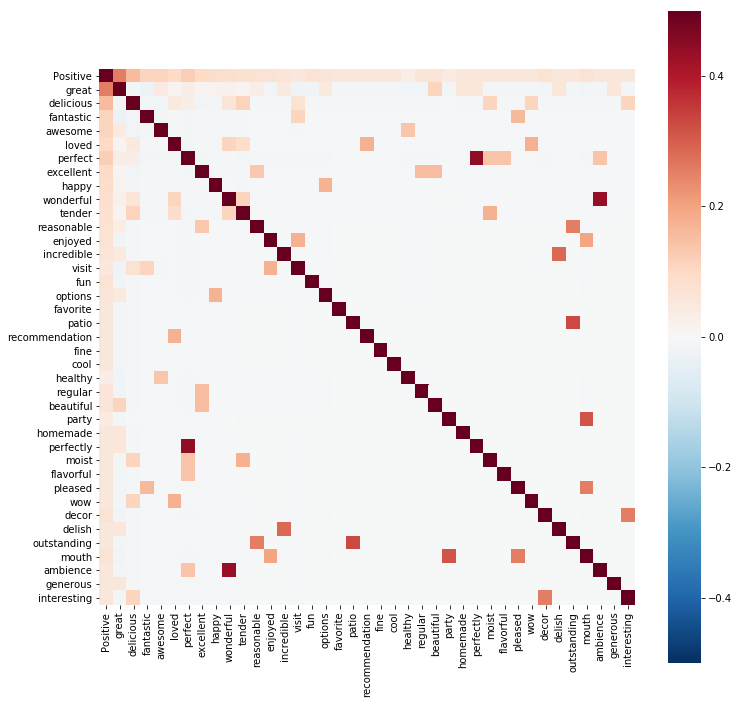

In [22]:
plt.rcParams['figure.figsize'] = 12, 12

sns.heatmap(df.corr(), vmin=-.5, vmax=.5, square=True, cmap='RdBu_r')

plt.show()

In [23]:
data = df[keywords]
target = df['Positive']

In [24]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(data, target)
y_pred = bnb.predict(data)
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

df['prediction'] = y_pred

Number of mislabeled points out of a total 1000 points : 284


In [25]:
bnb.score(data, target)

0.71599999999999997

## Confusion Matrix

In [26]:
confusion_matrix(target, y_pred)

array([[496,   4],
       [280, 220]])

### "Good" words with count (with spaces) >= 3:

500 True Negatives

0 False Positives

352 False Negatives

148 True Positives

BNB Score: 0.64800000000000002

### "Bad" words with count >= 3 (and spaces added around words):

193 True Negatives

307 False Positives

0 False Negatives

500 True Positives

BNB Score: 0.69299999999999995

### "Good" and "Bad" Words (with spaces) yielded exactly the same result as "Bad" words (with spaces) only.

### ''Good" words with count >= 3 (no spaces):

496 True Negatives

4 False Positives

280 False Negatives

220 True Positives

BNB Score: 0.71599999999999997

### ''Bad" words with count >= 3 (no spaces):

268 True Negatives

232 False Positives

11 False Negatives

489 True Positives

BNB Score: 0.75700000000000001


### "Good" and "Bad" Words (no spaces):

268 True Negatives

232 False Positives

7 False Negatives

493 True Positives

BNB Score: 0.76100000000000001

The overall best BNB score was for both Good and Bad words without spaces before and after the word in the pattern matching function, at 76.10%. However, if it is important to include either no false positives or no false negatives, using the spaces around the terms searched may be important.

## Word Cloud for True Positives:

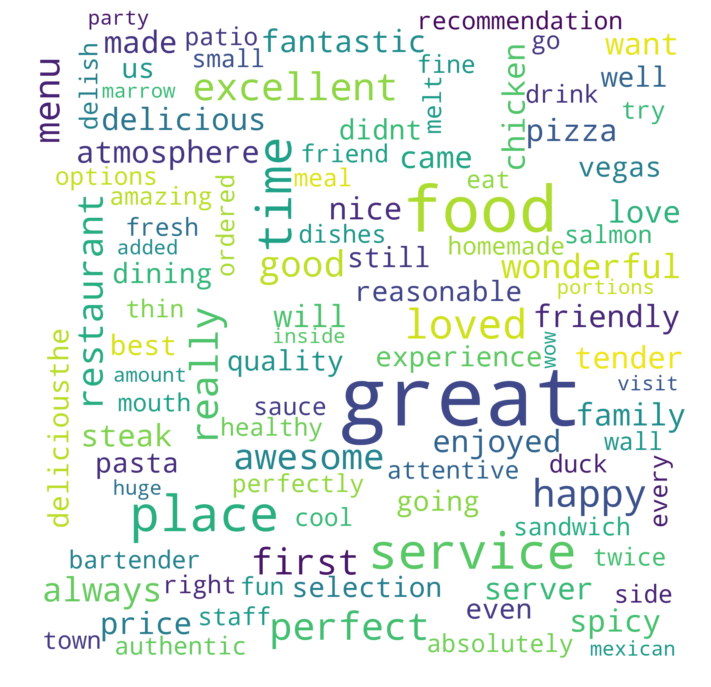

In [27]:
text1 = ''.join(review for review in df[(df['Positive'] == 1) & (df['prediction'] == 1)].Review)

plt.rcParams['figure.figsize'] = 12, 12

wordcloud = WordCloud(width=1600, height=1600, max_font_size=200, max_words=100, background_color='white').generate(text1)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Word Cloud for False Positives (Type 1 Errors):

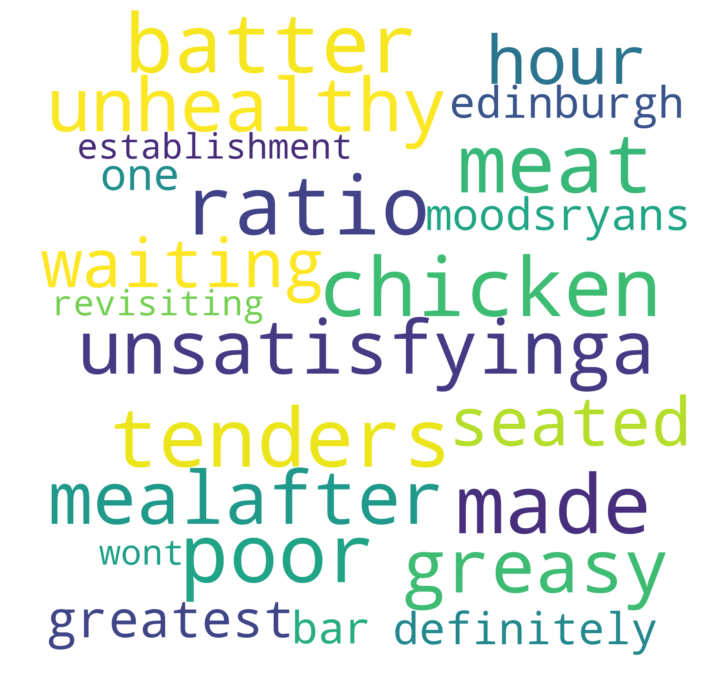

In [28]:
text1 = ''.join(review for review in df[(df['Positive'] == 0) & (df['prediction'] == 1)].Review)

plt.rcParams['figure.figsize'] = 12, 12

wordcloud = WordCloud(width=1600, height=1600, max_font_size=200, max_words=100, background_color='white').generate(text1)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Word Cloud for True Negatives:

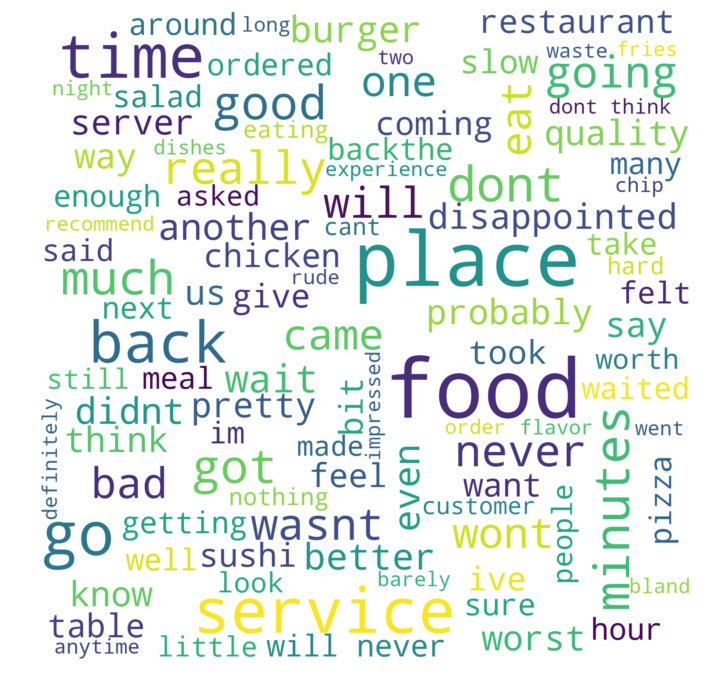

In [29]:
text1 = ''.join(review for review in df[(df['Positive'] == 0) & (df['prediction'] == 0)].Review)

plt.rcParams['figure.figsize'] = 12, 12

wordcloud = WordCloud(width=1600, height=1600, max_font_size=200, max_words=100, background_color='white').generate(text1)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Word Cloud for False Negatives (Type 2 Errors):

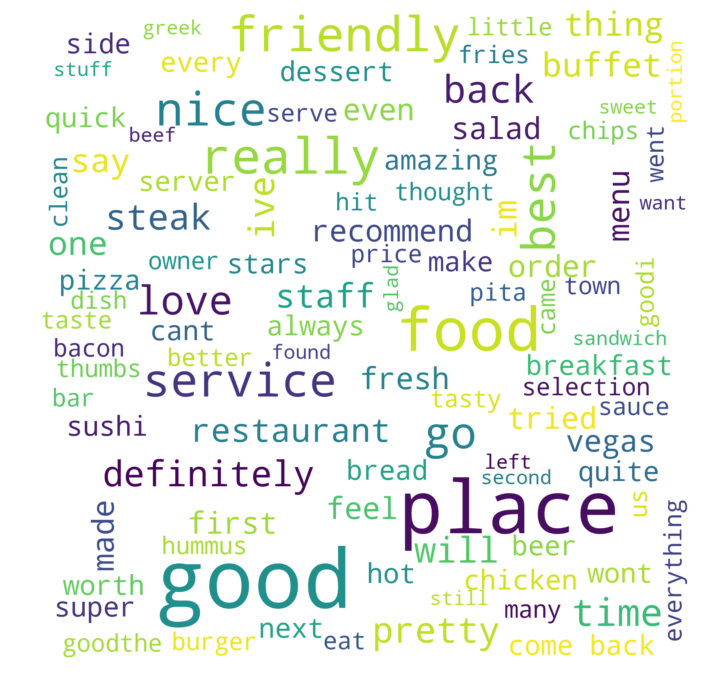

In [30]:
#No words to work from; returns error.

text1 = ''.join(review for review in df[(df['Positive'] == 1) & (df['prediction'] == 0)].Review)

plt.rcParams['figure.figsize'] = 12, 12

wordcloud = WordCloud(width=1600, height=1600, max_font_size=200, max_words=100, background_color='white').generate(text1)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# IMDB Reviews 

# SEE PART 2

In [31]:
imdb = pd.read_csv('imdb_labelled.txt', sep='\t', header=None)

In [32]:
imdb.rename(columns={0: 'Review', 1: 'Positive'}, inplace=True)

In [33]:
# replace punctuation 
imdb['Review'] = imdb.Review.str.replace(r'[^a-zA-Z\d\s:]', '')
# make lower case
imdb['Review'] = imdb['Review'].str.lower()

In [34]:
imdb.head()

,Review,Positive
0,a very very very slowmoving aimless movie abou...,0
1,not sure who was more lost the flat character...,0
2,attempting artiness with black white and clev...,0
3,very little music or anything to speak of,0
4,the best scene in the movie was when gerardo i...,1
